In [3]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape, t_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1), filters = 32, kernel_size = 3, padding = 'SAME', activation = 'relu', ))
model.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'SAME', activation = 'relu'))

model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [9]:
import numpy as np

In [11]:
hist = model.fit(x_train.reshape(-1, 28, 28, 1), t_train, batch_size = 50, epochs = 50, validation_split = 0.2)

Epoch 1/50
960/960 [==============================] - 22s 12ms/step - loss: 0.1529 - accuracy: 0.9529 - val_loss: 0.0528 - val_accuracy: 0.9847
Epoch 2/50
960/960 [==============================] - 12s 12ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 3/50
960/960 [==============================] - 11s 11ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0408 - val_accuracy: 0.9876
Epoch 4/50
960/960 [==============================] - 11s 12ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 5/50
960/960 [==============================] - 11s 11ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0426 - val_accuracy: 0.9879
Epoch 6/50
960/960 [==============================] - 11s 12ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 7/50
960/960 [==============================] - 11s 12ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0359 - val_accuracy:

In [12]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0646 - accuracy: 0.9932


[0.06455188989639282, 0.9932000041007996]

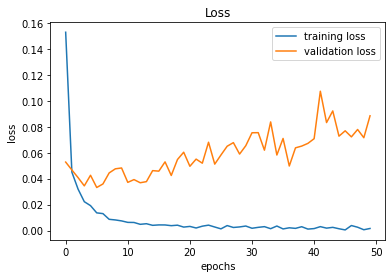

In [13]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

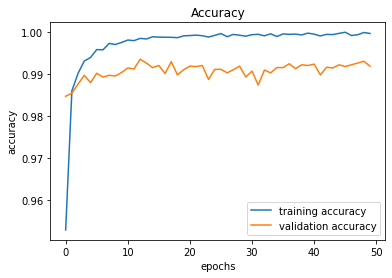

In [14]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

# padding = 'VALID

In [15]:
model2 = Sequential()

model2.add(Conv2D(input_shape = (28, 28, 1), filters = 32, kernel_size = 3, padding = 'SAME', activation = 'relu', ))
model2.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))

model2.add(Conv2D(filters = 64, kernel_size = 3, padding = 'SAME', activation = 'relu'))
model2.add(MaxPool2D(padding = 'SAME', pool_size = (2, 2)))

model2.add(Conv2D(filters = 128, kernel_size = 3, padding = 'VALID', activation = 'relu'))

model2.add(Flatten())

model2.add(Dense(10, activation = 'softmax'))

In [16]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 3200)             

In [17]:
hist2 = model2.fit(x_train.reshape(-1, 28, 28, 1), t_train, validation_split = 0.2, batch_size = 50, epochs = 50)

Epoch 1/50
960/960 [==============================] - 11s 11ms/step - loss: 0.1519 - accuracy: 0.9536 - val_loss: 0.0578 - val_accuracy: 0.9837
Epoch 2/50
960/960 [==============================] - 10s 10ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 3/50
960/960 [==============================] - 10s 11ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0342 - val_accuracy: 0.9904
Epoch 4/50
960/960 [==============================] - 10s 10ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9916
Epoch 5/50
960/960 [==============================] - 10s 11ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0374 - val_accuracy: 0.9897
Epoch 6/50
960/960 [==============================] - 10s 11ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0336 - val_accuracy: 0.9903
Epoch 7/50
960/960 [==============================] - 10s 11ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0329 - val_accuracy:

In [18]:
model2.evaluate(x_test.reshape(-1, 28, 28, 1), t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.9916


[0.08178193122148514, 0.991599977016449]

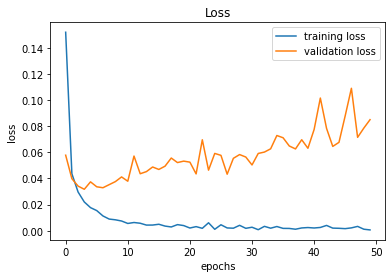

In [19]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist2.history['loss'], label = 'training loss')
plt.plot(hist2.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

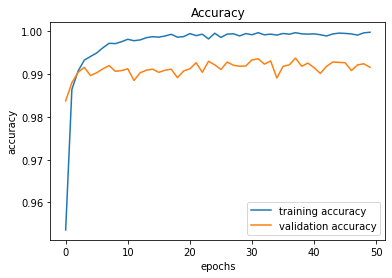

In [20]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist2.history['accuracy'], label = 'training accuracy')
plt.plot(hist2.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()